In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
 # Read data from Excel file
daily_temp = pd.read_excel(
    '../Data Files/mean-daily-temperature-fisher-river.xlsx', parse_dates=['Date'], index_col=0
)

In [3]:
# Display first 5 rows of the DataFrame
daily_temp.head(5)

,Mean_Temperature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


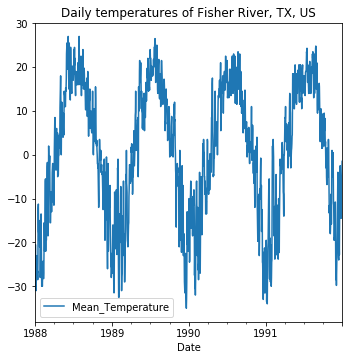

In [4]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)

In [5]:
# Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(5)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
Freq: M, Name: Mean_Temperature, dtype: float64

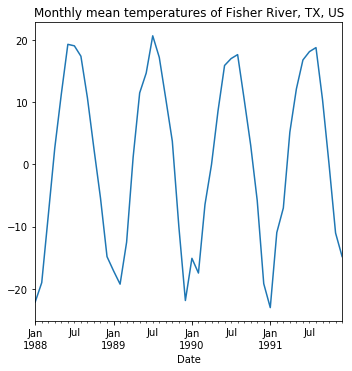

In [6]:
# Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)

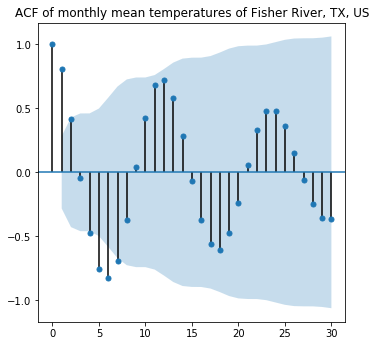

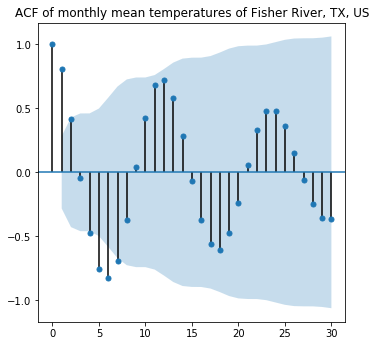

In [7]:
# Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
# ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
# autocorrelation_plot(monthly_mean_temp, ax=ax)
plot_acf(
    monthly_mean_temp,lags=30, title='ACF of monthly mean temperatures of Fisher River, TX, US', ax=ax
)

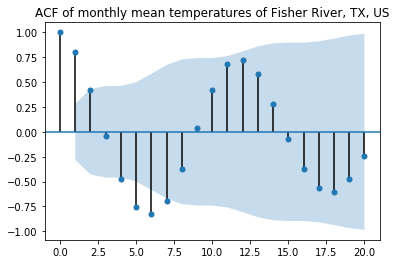

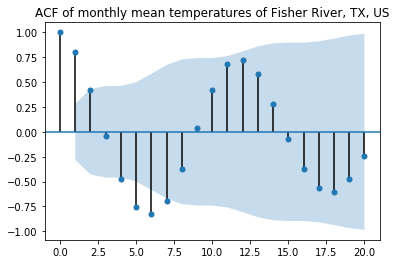

In [8]:
plot_acf(monthly_mean_temp,lags=20, title='ACF of monthly mean temperatures of Fisher River, TX, US')

(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20]),
 array([-0.24461246, -0.47536716, -0.60369003, -0.55747598, -0.36492553,
        -0.06054339,  0.28827097,  0.58481628,  0.72311458,  0.67511451,
         0.41732813,  0.03541151, -0.37288728, -0.69382203, -0.82407157,
        -0.74793269, -0.46766027, -0.03692674,  0.42650131,  0.80754769,
         1.        ,  0.80754769,  0.42650131, -0.03692674, -0.46766027,
        -0.74793269, -0.82407157, -0.69382203, -0.37288728,  0.03541151,
         0.41732813,  0.67511451,  0.72311458,  0.58481628,  0.28827097,
        -0.06054339, -0.36492553, -0.55747598, -0.60369003, -0.47536716,
        -0.24461246]),
 <matplotlib.lines.Line2D at 0x106da3250>)

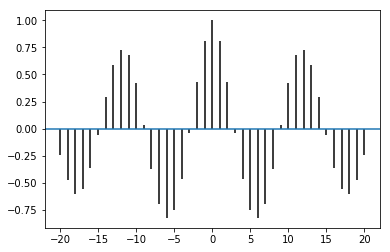

In [9]:
plt.acorr(monthly_mean_temp, maxlags=20)

In [10]:
# Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

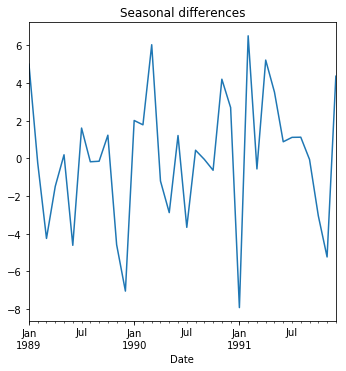

In [11]:
# Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

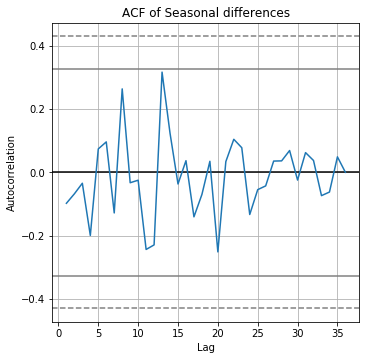

In [12]:
# Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax, )

In [13]:
# Perform Ljung-Box test on monthly mean temperature to get the p-values
# We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(
    monthly_mean_temp, unbiased=True, nlags=10, qstat=True, alpha=0.05
)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [14]:
# Perform Ljung-Box test on monthly mean temperature to get the p-values
# We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(
    seasonal_diff, unbiased=True, nlags=10, qstat=True, alpha=0.05
)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


In [15]:
acf , confint, qstat, pval_monthly_mean = stattools.acf(
    monthly_mean_temp, unbiased=True, nlags=10, qstat=True, alpha=0.05
)

In [16]:
acf

array([ 1.        ,  0.82121601,  0.43789222, -0.04877309, -0.51999611,
       -0.84325636, -0.94733394, -0.81435569, -0.44587746,  0.0480098 ,
        0.53247722])

In [17]:
confint

array([[ 1.        ,  1.        ],
       [ 0.53831958,  1.10411245],
       [ 0.00433172,  0.87145271],
       [-0.51639077,  0.41884459],
       [-0.98802073, -0.05197149],
       [-1.35543488, -0.33107784],
       [-1.56063897, -0.3340289 ],
       [-1.53531912, -0.09339225],
       [-1.23703902,  0.3452841 ],
       [-0.76301287,  0.85903247],
       [-0.27877287,  1.3437273 ]])

In [18]:
qstat

array([ 34.43722932,  44.44155592,  44.568426  ,  59.31729629,
        99.00555453, 150.28793114, 189.10794203, 201.03634474,
       201.17818727, 219.08547071])

In [19]:
pval_monthly_mean

array([4.40221738e-09, 2.23685971e-10, 1.14282256e-09, 4.03613581e-12,
       8.56282618e-20, 6.72521680e-30, 2.31668653e-37, 3.86473537e-39,
       1.87593649e-38, 1.66080971e-41])